In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [ ]:
#https://stackoverflow.com/questions/20953594/barplot-in-r-ggplot-with-multiple-factors

In [2]:
df1<-data.frame(Loc=c(rep("L1",5),rep("L2",3),rep("L3",4)),
Type=c(rep("T1",3),rep("T2",2),"T1","T2","T2","T1","T1","T2","T2"),
       y2009=rep("A",12),y2010=c("A","B","A","A","A","A","B","B","A","A","B","B"),
       y2011=c("B","B","B","A","B",rep("B",4),"A","B","B"))
df1

Loc,Type,y2009,y2010,y2011
<chr>,<chr>,<chr>,<chr>,<chr>
L1,T1,A,A,B
L1,T1,A,B,B
L1,T1,A,A,B
L1,T2,A,A,A
L1,T2,A,A,B
L2,T1,A,A,B
L2,T2,A,B,B
L2,T2,A,B,B
L3,T1,A,A,B


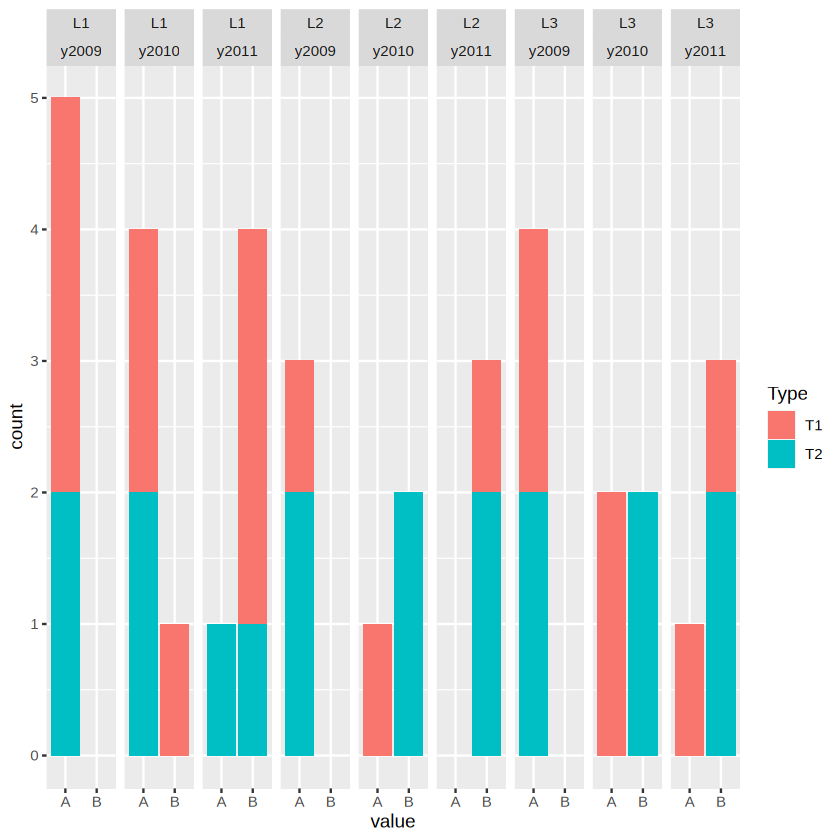

In [7]:
df2 <- melt(df1, id.vars=c("Loc", "Type"))
ggplot(data=df2, aes(x=value, fill=Type)) + 
  geom_bar() + facet_wrap(~ Loc + variable, nrow=1)


In [ ]:
ggplot(data_long, aes(x = Sample, y = Layer_val, fill = Layers)) +
    geom_bar(position = "dodge", stat = "identity", colour = "black") +
    ggtitle("Aβ/AT8+ spots") +

In [9]:
df1

Loc,Type,y2009,y2010,y2011
<chr>,<chr>,<chr>,<chr>,<chr>
L1,T1,A,A,B
L1,T1,A,B,B
L1,T1,A,A,B
L1,T2,A,A,A
L1,T2,A,A,B
L2,T1,A,A,B
L2,T2,A,B,B
L2,T2,A,B,B
L3,T1,A,A,B


In [10]:
ggplot(data=df2, aes(x=value, fill=Type)) + 
geom_bar(position = "dodge", stat = "identity", colour = "black") 

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while setting up geom.
ℹ Error occurred in the 1st layer.
Caused by error in `compute_geom_1()`:
! `geom_bar()` requires the following missing aesthetics: y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conten

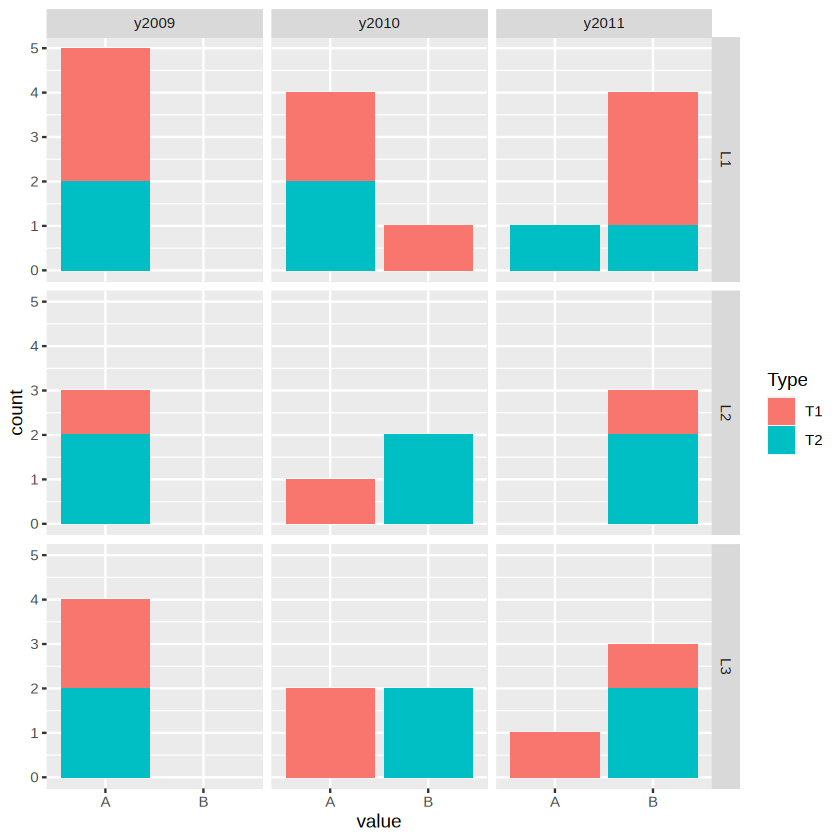

In [8]:
df2 <- melt(df1, id.vars=c("Loc", "Type"))
ggplot(data=df2, aes(x=value, fill=Type)) + 
  geom_bar() + facet_grid(Loc ~ variable)

In [3]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/All_plot_data.xlsx", sheet = "Sheet8", .name_repair = "minimal")

data <- exl_file[, c(1:4)]
data$p.sci <- format(data$`pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Layer 2-3`, `Layer 4-6`)

In [13]:
data_long

Sample,pval,p.sci,Layers,Layer_val
<chr>,<dbl>,<chr>,<chr>,<dbl>
Aβ+,0.2,2e-01,Layer 2-3,22.51050
AT8+,0.8,8e-01,Layer 2-3,25.50208
Aβ+,0.2,2e-01,Layer 4-6,14.60050
AT8+,0.8,8e-01,Layer 4-6,25.57105


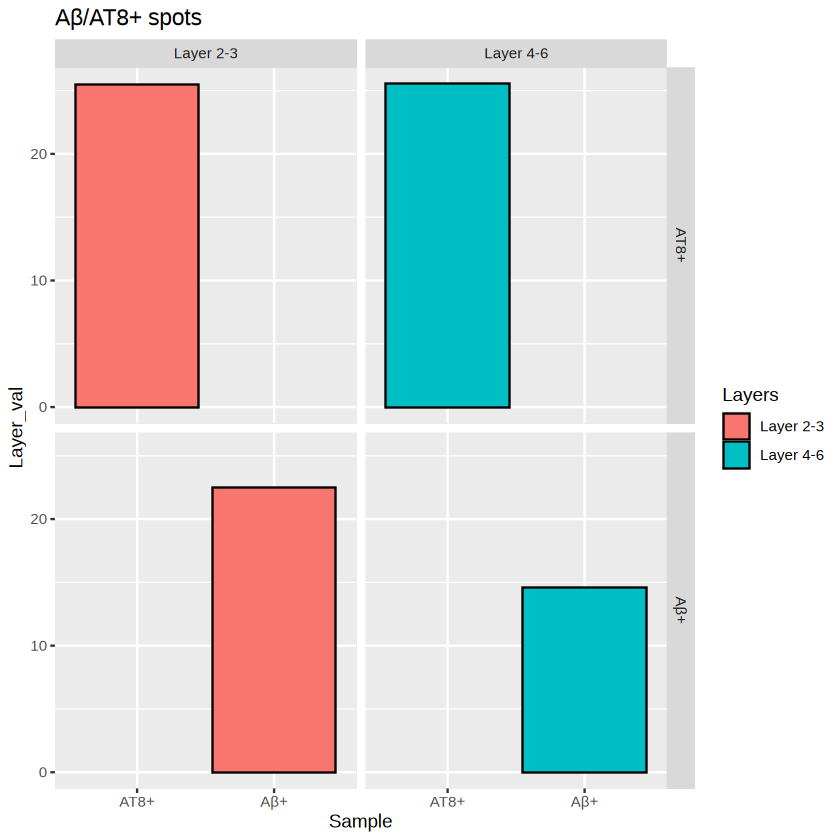

In [4]:
ggplot(data_long, aes(x = Sample, y = Layer_val, fill = Layers)) +
    geom_bar(position = "dodge", stat = "identity", colour = "black") +
    ggtitle("Aβ/AT8+ spots")+ facet_grid(Sample ~ Layers)

In [2]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/combined_all_plots.xlsx", sheet = "Sheet1", .name_repair = "minimal")

In [3]:
data <- exl_file[, c(1:3, 6,8:9)]

data$p.sci <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
head(data)
#data_long <- gather(data, key = "Layers", value = "Layer_val", `Layer 2-3`, `Layer 4-6`)
data_long <- gather(data, key = "Ab_Type", value = "Ab_Value", `Ab-Level 0`, `Ab-Others`)
head(data_long)

Cell_state,Ab-Level 0,Ab-Others,Ab-pval,Layer,Reference,p.sci
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Homeostatic,0.2226277,0.2509544,0.01060,Layer II-VI,All,1.06e-02
Activated,0.2890511,0.2365481,0.00026,Layer II-VI,All,2.60e-04
Homeostatic,0.1569390,0.2396122,0.00354,Layer II-III,All,3.54e-03
Activated,0.3553826,0.2717588,0.00695,Layer II-III,All,6.95e-03
Homeostatic,0.3071786,0.2710042,0.53300,Layer IV-VI,All,5.33e-01
Activated,0.2036728,0.2090833,0.70100,Layer IV-VI,All,7.01e-01


Cell_state,Ab-pval,Layer,Reference,p.sci,Ab_Type,Ab_Value
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,0.01060,Layer II-VI,All,1.06e-02,Ab-Level 0,0.2226277
Activated,0.00026,Layer II-VI,All,2.60e-04,Ab-Level 0,0.2890511
Homeostatic,0.00354,Layer II-III,All,3.54e-03,Ab-Level 0,0.1569390
Activated,0.00695,Layer II-III,All,6.95e-03,Ab-Level 0,0.3553826
Homeostatic,0.53300,Layer IV-VI,All,5.33e-01,Ab-Level 0,0.3071786
Activated,0.70100,Layer IV-VI,All,7.01e-01,Ab-Level 0,0.2036728


In [11]:
data_long

Cell_state,Ab-pval,Layer,Reference,p.sci,Ab_Type,Ab_Value
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,1.06e-02,Layer II-VI,All,1.06e-02,Ab-Level 0,0.22262774
Activated,2.60e-04,Layer II-VI,All,2.60e-04,Ab-Level 0,0.28905109
Homeostatic,3.54e-03,Layer II-III,All,3.54e-03,Ab-Level 0,0.15693904
Activated,6.95e-03,Layer II-III,All,6.95e-03,Ab-Level 0,0.35538262
Homeostatic,5.33e-01,Layer IV-VI,All,5.33e-01,Ab-Level 0,0.30717863
Activated,7.01e-01,Layer IV-VI,All,7.01e-01,Ab-Level 0,0.20367279
Homeostatic,1.02e-08,Layer II-VI,Xenografted-mic,1.02e-08,Ab-Level 0,0.18905109
Activated,5.83e-11,Layer II-VI,Xenografted-mic,5.83e-11,Ab-Level 0,0.31970803
Homeostatic,1.62e-04,Layer II-III,Xenografted-mic,1.62e-04,Ab-Level 0,0.03112840


In [14]:
data_long[35,]

Cell_state,Ab-pval,Layer,Reference,p.sci,Ab_Type,Ab_Value
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,0.533,Layer IV-VI,All,5.33e-01,Ab-Others,0.2710042


In [15]:
data_long_ed <- (data_long)[c(1:2,35:36),]
data_long_ed 

Cell_state,Ab-pval,Layer,Reference,p.sci,Ab_Type,Ab_Value
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,0.01060,Layer II-VI,All,1.06e-02,Ab-Level 0,0.2226277
Activated,0.00026,Layer II-VI,All,2.60e-04,Ab-Level 0,0.2890511
Homeostatic,0.53300,Layer IV-VI,All,5.33e-01,Ab-Others,0.2710042
Activated,0.70100,Layer IV-VI,All,7.01e-01,Ab-Others,0.2090833


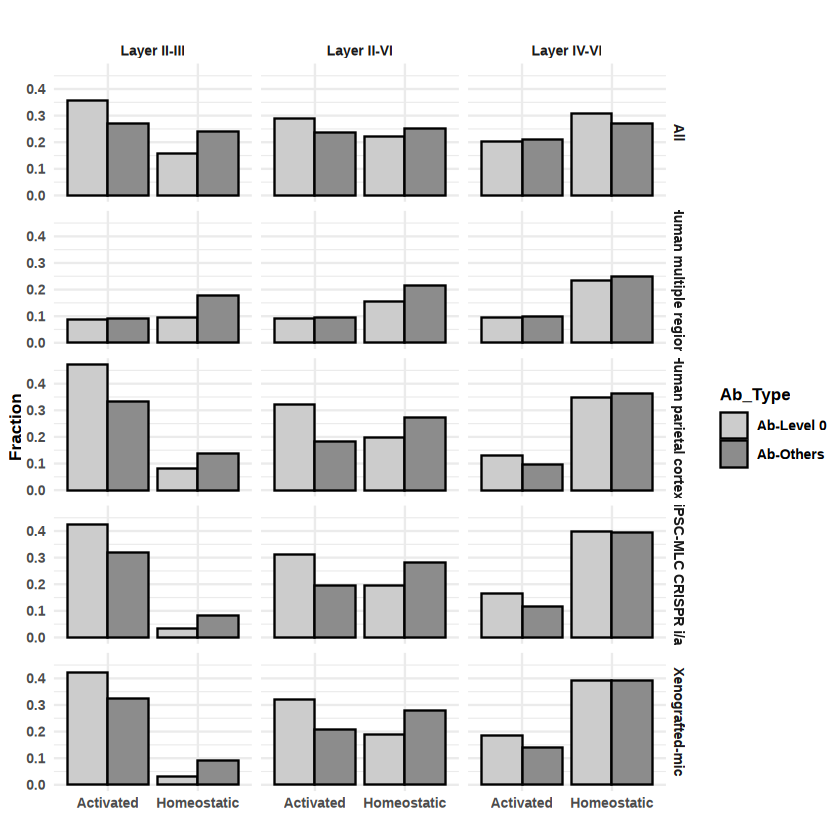

In [30]:
p <- ggplot(data_long, aes(x = Cell_state, y = Ab_Value, fill = Ab_Type)) +
    geom_bar(position = "dodge", stat = "identity", colour = "black") +
    ggtitle("") +
    theme_minimal() +
    scale_fill_manual(values = c("#cccccc", "#8c8c8c")) +
    #annotate("text",
     #   x = c(1,2), y = max(data_long_ed$Ab_Value) + 0.02,
      #  label = data$p.sci, size = 8, fontface = "bold"
    #) +
    theme(
        text = element_text(size = 10, face = "bold",color = "black"),
        axis.text.x = element_text(angle = 0, vjust = 1.5)
    ) +xlab("")+ylab("Fraction")
    
    p+ facet_grid(Reference ~ Layer)

In [32]:
(p$data$Layer) <- p$data$Layer

NULL

In [9]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/All_plot_data.xlsx", sheet = "Sheet1", .name_repair = "minimal")

data <- exl_file[, c(1:3, 6)]
data$Cell_state <- factor(data$Cell_state, levels = c("Homeostatic", "Activated"))
data$p.sci <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Ab_Type", value = "Ab_Value", `Ab-Level 0`, `Ab-Others`)
data
data_long


Cell_state,Ab-Level 0,Ab-Others,Ab-pval,p.sci
<fct>,<dbl>,<dbl>,<dbl>,<chr>
Homeostatic,0.2226277,0.2509544,0.01060,1.06e-02
Activated,0.2890511,0.2365481,0.00026,2.60e-04


Cell_state,Ab-pval,p.sci,Ab_Type,Ab_Value
<fct>,<dbl>,<chr>,<chr>,<dbl>
Homeostatic,0.01060,1.06e-02,Ab-Level 0,0.2226277
Activated,0.00026,2.60e-04,Ab-Level 0,0.2890511
Homeostatic,0.01060,1.06e-02,Ab-Others,0.2509544
Activated,0.00026,2.60e-04,Ab-Others,0.2365481


In [ ]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/All_plot_data.xlsx", sheet = "Sheet1", .name_repair = "minimal")

data <- exl_file[, c(1:3, 6)]
data$Cell_state <- factor(data$Cell_state, levels = c("Homeostatic", "Activated"))
data$p.sci <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Ab_Type", value = "Ab_Value", `Ab-Level 0`, `Ab-Others`)



p <- ggplot(data_long, aes(x = Cell_state, y = Ab_Value, fill = Ab_Type)) +
    geom_bar(position = "dodge", stat = "identity", colour = "black") +
    ggtitle("") +
    theme_minimal() +
    scale_fill_manual(values = c("#cccccc", "#8c8c8c")) +
    annotate("text",
        x = c(1, 2), y = max(data_long$Ab_Value) + 0.02,
        label = data$p.sci, size = 8, fontface = "bold"
    ) +
    theme(
        text = element_text(size = 30, face = "bold",color = "black"),
        axis.text.x = element_text(angle = 0, vjust = 1.5)
    ) + NoLegend()+xlab("")+ylab("Fraction")

In [ ]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/All_plot_data.xlsx", sheet = "Sheet8", .name_repair = "minimal")

data <- exl_file[, c(1:4)]
data$p.sci <- format(data$`pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Layer 2-3`, `Layer 4-6`)

p <- ggplot(data_long, aes(x = Sample, y = Layer_val, fill = Layers)) +
    geom_bar(position = "dodge", stat = "identity", colour = "black") +
    ggtitle("Aβ/AT8+ spots") +
    theme_minimal() +
    scale_fill_manual(values = c("#00AFBB", "#E7B800")) +
    annotate("text",
        x = c(1, 2), y = max(data_long$Layer_val) + 2,
        label = data$p.sci, size = 8, fontface = "bold"
    ) +
    theme(
        text = element_text(size = 30, face = "bold"),
        axis.text.x = element_text(angle = 0, vjust = 1.5)
     )  +xlab("")+ylab("Percentage")
p$data$Sample <- factor(p$data$Sample, levels = c('Aβ+','AT8+'))
p

In [2]:
https://github.com/adayim/forestploter

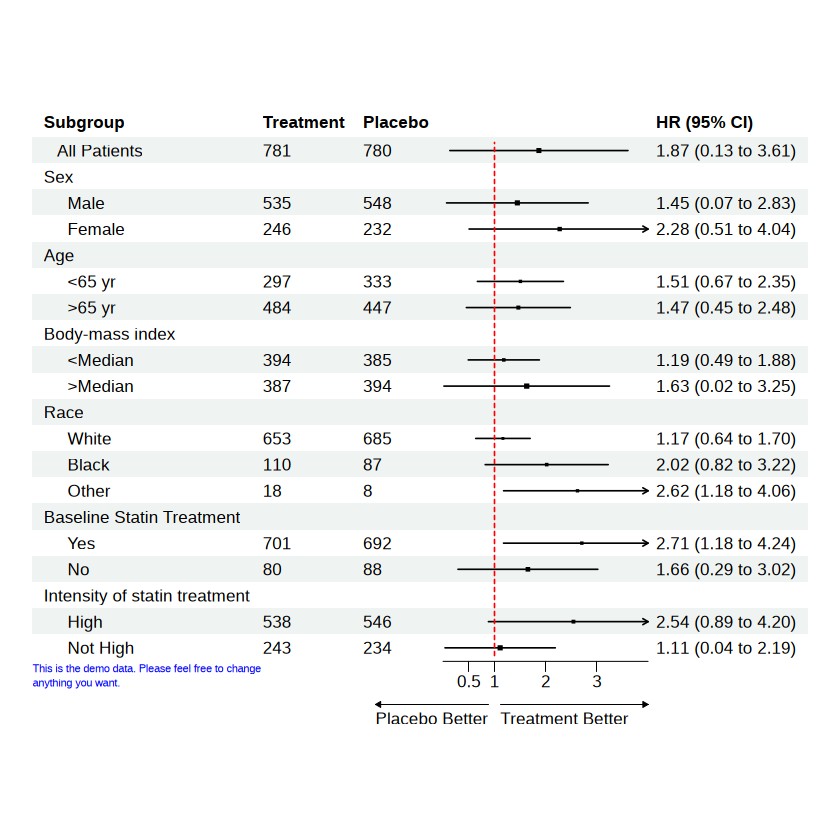

In [384]:

dt <- read.csv(system.file("extdata", "example_data.csv", package = "forestploter"))

# Indent the subgroup if there is a number in the placebo column
dt$Subgroup <- ifelse(is.na(dt$Placebo), 
                      dt$Subgroup,
                      paste0("   ", dt$Subgroup))

# NA to blank
dt$Treatment <- ifelse(is.na(dt$Treatment), "", dt$Treatment)
dt$Placebo <- ifelse(is.na(dt$Placebo), "", dt$Placebo)
dt$se <- (log(dt$hi) - log(dt$est))/1.96

# Add a blank column for the forest plot to display CI.
# Adjust the column width with space. 
dt$` ` <- paste(rep(" ", 20), collapse = " ")

# Create confidence interval column to display
dt$`HR (95% CI)` <- ifelse(is.na(dt$se), "",
                             sprintf("%.2f (%.2f to %.2f)",
                                     dt$est, dt$low, dt$hi))

# Define theme
tm <- forest_theme(base_size = 10,
                   refline_col = "red",
                   arrow_type = "closed",
                   footnote_col = "blue")

p <- forest(dt[,c(1:3, 20:21)],
            est = dt$est,
            lower = dt$low, 
            upper = dt$hi,
            sizes = dt$se,
            ci_column = 4,
            ref_line = 1,
            arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 4),
            ticks_at = c(0.5, 1, 2, 3),
            footnote = "This is the demo data. Please feel free to change\nanything you want.",
            theme = tm)

# Print plot
plot(p)

In [386]:
df1 <- dt[,c(1:3, 20:21)]

write.csv(df1, "check.csv")
df1

Subgroup,Treatment,Placebo,,HR (95% CI)
<chr>,<chr>,<chr>,<chr>,<chr>
All Patients,781,780,,1.87 (0.13 to 3.61)
Sex,,,,
Male,535,548,,1.45 (0.07 to 2.83)
Female,246,232,,2.28 (0.51 to 4.04)
Age,,,,
<65 yr,297,333,,1.51 (0.67 to 2.35)
>65 yr,484,447,,1.47 (0.45 to 2.48)
Body-mass index,,,,
<Median,394,385,,1.19 (0.49 to 1.88)


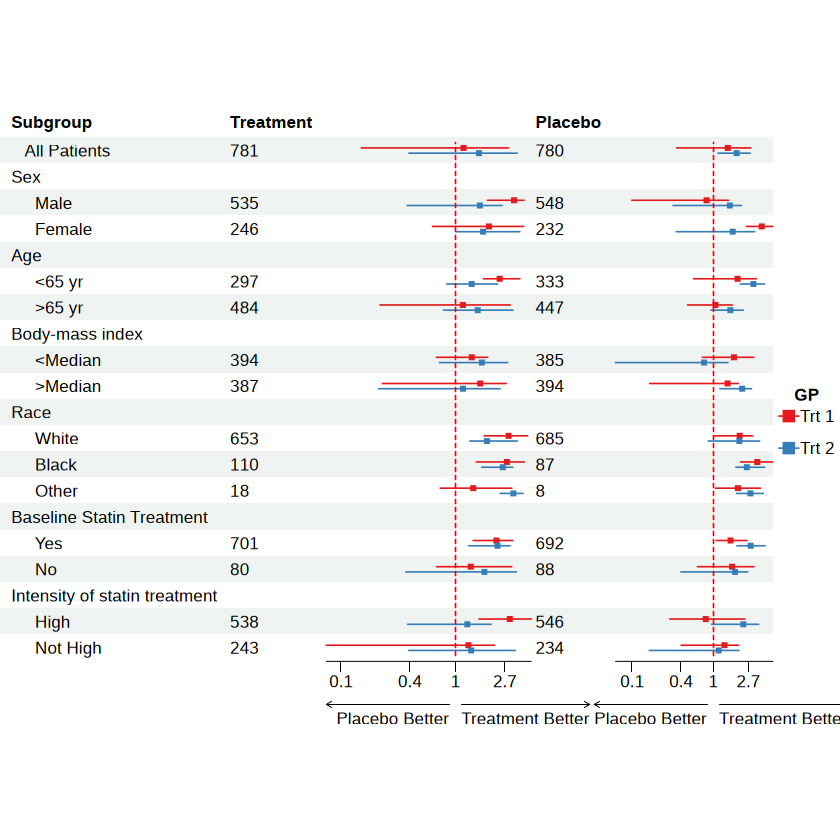

In [20]:

# Add a blank column for the second CI column
dt$`   ` <- paste(rep(" ", 15), collapse = " ")

# Set-up theme
tm <- forest_theme(base_size = 10,
                   refline_col = "red",
                   footnote_col = "blue",
                   legend_name = "GP",
                   legend_value = c("Trt 1", "Trt 2"))

p <- forest(dt[,c(1:2, 20, 3, 22)],
            est = list(dt$est_gp1,
                       dt$est_gp2,
                       dt$est_gp3,
                       dt$est_gp4),
            lower = list(dt$low_gp1,
                         dt$low_gp2,
                         dt$low_gp3,
                         dt$low_gp4), 
            upper = list(dt$hi_gp1,
                         dt$hi_gp2,
                         dt$hi_gp3,
                         dt$hi_gp4),
            ci_column = c(3, 5),
            ref_line = 1,
            arrow_lab = c("Placebo Better", "Treatment Better"),
            nudge_y = 0.2,
            x_trans = "log",
            theme = tm)

plot(p)

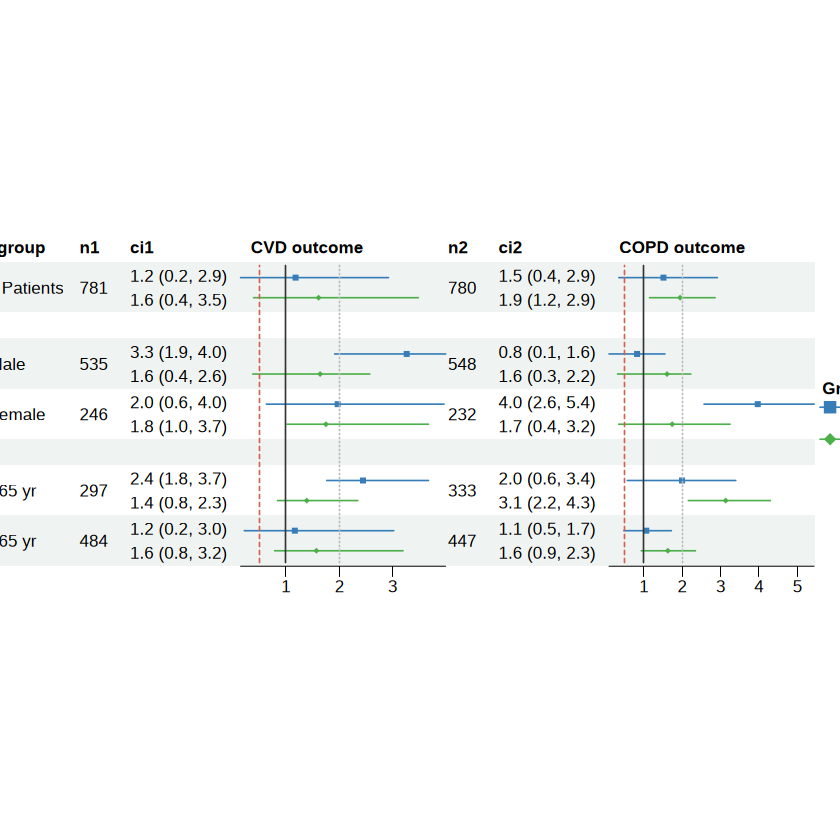

In [360]:
dt <- read.csv(system.file("extdata", "example_data.csv", package = "forestploter"))
dt <- dt[1:7, ]
# indent the subgroup if there is a number in the placebo column
dt$Subgroup <- ifelse(is.na(dt$Placebo), 
                      dt$Subgroup,
                      paste0("   ", dt$Subgroup))

# NA to blank or NA will be transformed to carachter.
dt$n1 <- ifelse(is.na(dt$Treatment), "", dt$Treatment)
dt$n2 <- ifelse(is.na(dt$Placebo), "", dt$Placebo)

# Add two blank column for CI
dt$`CVD outcome` <- paste(rep(" ", 20), collapse = " ")
dt$`COPD outcome` <- paste(rep(" ", 20), collapse = " ")

# Generate point estimation and 95% CI. Paste two CIs together and separate by line break.
dt$ci1 <- paste(sprintf("%.1f (%.1f, %.1f)", dt$est_gp1, dt$low_gp1, dt$hi_gp1),
                sprintf("%.1f (%.1f, %.1f)", dt$est_gp3, dt$low_gp3, dt$hi_gp3),
                sep = "\n")
dt$ci1[grepl("NA", dt$ci1)] <- "" # Any NA to blank

dt$ci2 <- paste(sprintf("%.1f (%.1f, %.1f)", dt$est_gp2, dt$low_gp2, dt$hi_gp2),
                sprintf("%.1f (%.1f, %.1f)", dt$est_gp4, dt$low_gp4, dt$hi_gp4),
                sep = "\n")
dt$ci2[grepl("NA", dt$ci2)] <- ""

# Set-up theme
tm <- forest_theme(base_size = 10,
                   refline_lty = "solid",
                   ci_pch = c(15, 18),
                   ci_col = c("#377eb8", "#4daf4a"),
                   footnote_col = "blue",
                   legend_name = "Group",
                   legend_value = c("Trt 1", "Trt 2"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#d6604d", "#bababa"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(4, 3), "mm")))

p <- forest(dt[,c(1, 19, 23, 21, 20, 24, 22)],
            est = list(dt$est_gp1,
                       dt$est_gp2,
                       dt$est_gp3,
                       dt$est_gp4),
            lower = list(dt$low_gp1,
                         dt$low_gp2,
                         dt$low_gp3,
                         dt$low_gp4), 
            upper = list(dt$hi_gp1,
                         dt$hi_gp2,
                         dt$hi_gp3,
                         dt$hi_gp4),
            ci_column = c(4, 7),
            ref_line = 1,
            vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)

plot(p)

In [361]:
dt[,c(1, 19, 23, 21, 20, 24, 22)]

,Subgroup,n1,ci1,CVD outcome,n2,ci2,COPD outcome
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,All Patients,781,"1.2 (0.2, 2.9) 1.6 (0.4, 3.5)",,780,"1.5 (0.4, 2.9) 1.9 (1.2, 2.9)",
2,Sex,,,,,,
3,Male,535,"3.3 (1.9, 4.0) 1.6 (0.4, 2.6)",,548,"0.8 (0.1, 1.6) 1.6 (0.3, 2.2)",
4,Female,246,"2.0 (0.6, 4.0) 1.8 (1.0, 3.7)",,232,"4.0 (2.6, 5.4) 1.7 (0.4, 3.2)",
5,Age,,,,,,
6,<65 yr,297,"2.4 (1.8, 3.7) 1.4 (0.8, 2.3)",,333,"2.0 (0.6, 3.4) 3.1 (2.2, 4.3)",
7,>65 yr,484,"1.2 (0.2, 3.0) 1.6 (0.8, 3.2)",,447,"1.1 (0.5, 1.7) 1.6 (0.9, 2.3)",


In [6]:
dt <- read.csv(system.file("extdata", "example_data.csv", package = "forestploter"))

#write.csv(dt, "check.csv")

# indent the subgroup if there is a number in the placebo column
dt$Subgroup <- ifelse(is.na(dt$Placebo), 
                      dt$Subgroup,
                      paste0("   ", dt$Subgroup))

# NA to blank or NA will be transformed to carachter.
dt$n1 <- ifelse(is.na(dt$Treatment), "", dt$Treatment)
dt$n2 <- ifelse(is.na(dt$Placebo), "", dt$Placebo)

dt$`CVD outcome` <- paste(rep(" ", 20), collapse = " ")
dt$`COPD outcome` <- paste(rep(" ", 20), collapse = " ")
# Generate point estimation and 95% CI. Paste two CIs together and separate by line break.
dt$ci1 <- paste(sprintf("%.1f (%.1f, %.1f)", dt$est_gp1, dt$low_gp1, dt$hi_gp1),
                sprintf("%.1f (%.1f, %.1f)", dt$est_gp3, dt$low_gp3, dt$hi_gp3),
                sep = "\n")
dt$ci1[grepl("NA", dt$ci1)] <- "" # Any NA to blank
head(dt)
dt[,c(1, 19, 23, 21)] %>% head()

,Subgroup,Treatment,Placebo,est,low,hi,low_gp1,low_gp2,low_gp3,low_gp4,⋯,est_gp4,hi_gp1,hi_gp2,hi_gp3,hi_gp4,n1,n2,CVD outcome,COPD outcome,ci1
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,All Patients,781,780,1.869694,0.13245636,3.606932,0.1507971,0.35443249,0.3939730,1.1515801,⋯,1.949433,2.924330,2.919964,3.485182,2.862447,781,780,,,"1.2 (0.2, 2.9) 1.6 (0.4, 3.5)"
2,Sex,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,,,,,
3,Male,535,548,1.449472,0.06834426,2.830600,1.9149515,0.09953409,0.3803214,0.3213258,⋯,1.607950,3.996409,1.553593,2.573538,2.228632,535,548,,,"3.3 (1.9, 4.0) 1.6 (0.4, 2.6)"
4,Female,246,232,2.275120,0.50768005,4.042560,0.6336414,2.57367694,1.0229365,0.3510777,⋯,1.742973,3.965617,5.439582,3.674689,3.249342,246,232,,,"2.0 (0.6, 4.0) 1.8 (1.0, 3.7)"
5,Age,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,,,,,
6,<65 yr,297,333,1.509242,0.67029394,2.348190,1.7679431,0.57329716,0.8433183,2.1637576,⋯,3.136695,3.674451,3.399146,2.346744,4.299211,297,333,,,"2.4 (1.8, 3.7) 1.4 (0.8, 2.3)"


,Subgroup,n1,ci1,CVD outcome
,<chr>,<chr>,<chr>,<chr>
1,All Patients,781,"1.2 (0.2, 2.9) 1.6 (0.4, 3.5)",
2,Sex,,,
3,Male,535,"3.3 (1.9, 4.0) 1.6 (0.4, 2.6)",
4,Female,246,"2.0 (0.6, 4.0) 1.8 (1.0, 3.7)",
5,Age,,,
6,<65 yr,297,"2.4 (1.8, 3.7) 1.4 (0.8, 2.3)",


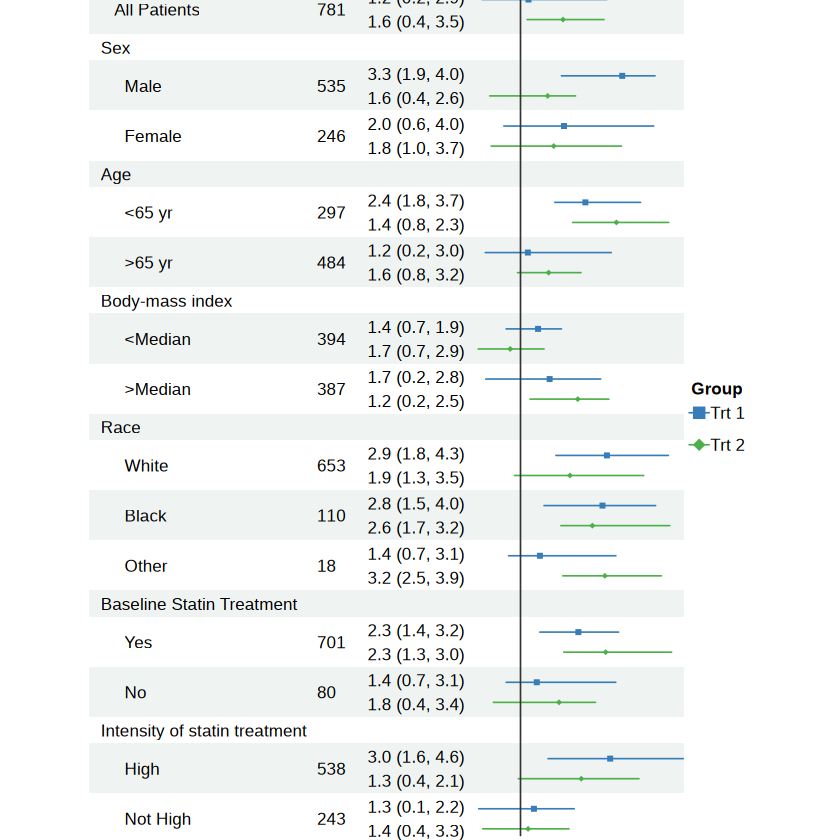

In [7]:
p <- forest(dt[,c(1, 19, 23, 21)],
            est = list(dt$est_gp1,
                       dt$est_gp4),
            lower = list(dt$low_gp1,
                         dt$low_gp4), 
            upper = list(dt$hi_gp1,
                         dt$hi_gp4),
            ci_column = 4,
            ref_line = 1,
            nudge_y = 0.4,
            theme = tm)

#ggplot("check.pdf")

ggsave(plot = p, "/home/a.garg/integration_project/step_14/11march_final/check.pdf", height = 14, width = 14, bg = "white")
p

Dose,min,q1,med,q3,max,Box
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
OJ.0.5,-0.0125,9.700,12.25,16.175,25.8875,
VC.0.5,-1.4750,5.950,7.15,10.900,18.3250,
OJ.1,12.2750,20.300,23.45,25.650,33.6750,
VC.1,12.2375,15.275,16.50,17.300,20.3375,
OJ.2,20.8250,24.575,25.95,27.075,30.8250,
VC.2,15.2375,23.375,25.95,28.800,36.9375,


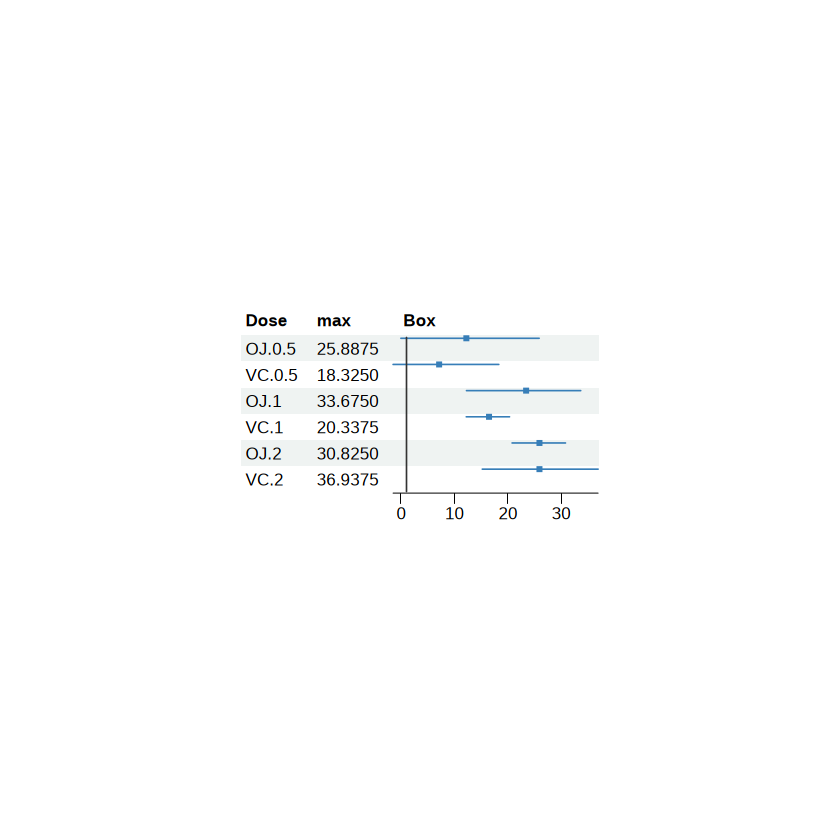

In [13]:
# Function to calculate Box plot values
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("min" = q3[1] - 1.5*iqr, "q1" = q3[1], "med" = q3[2],
    "q3" = q3[3], "max" = q3[3] + 1.5*iqr)
}
# Prepare data
val <- split(ToothGrowth$len, list(ToothGrowth$supp, ToothGrowth$dose))
val <- lapply(val, box_func)

dat <- do.call(rbind, val)
dat <- data.frame(Dose = row.names(dat),
                  dat, row.names = NULL)

dat$Box <- paste(rep(" ", 20), collapse = " ")

# Draw single group box plot
#tm <- forest_theme(ci_Theight = 0.2)

tm <- forest_theme(base_size = 10,
                   refline_lty = "solid",
                   ci_pch = c(15, 18),
                   ci_col = c("#377eb8", "#4daf4a"),
                   footnote_col = "blue",
                   legend_name = "Group",
                   legend_value = c("Trt 1", "Trt 2"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#d6604d", "#bababa"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(4, 3), "mm")))

dat

p <- forest(dat[,c(1,6, 7)],
             est = dat$med,
             lower = dat$min,
            upper = dat$max,
            ci_column = 3,
            ref_line = 1,
            nudge_y = 0.4,
            theme = tm)



# p <- forest(dat[,c(1, 7)],
#             est = dat$med,
#             lower = dat$min,
#             upper = dat$max,
#             # sizes = sizes,
#             fn_ci = make_boxplot,
#             ci_column = 2,
#             lowhinge = dat$q1, 
#             uphinge = dat$q3,
#             hinge_height = 0.2,
#             # values of the lowhinge and uphinge will be used as row values
#             index_args = c("lowhinge", "uphinge"), 
#             gp_box = gpar(fill = "black", alpha = 0.4),
#             theme = tm
# )
p

In [15]:
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


In [19]:
table(ToothGrowth$dose)


0.5   1   2 
 20  20  20 

In [17]:
val <- split(ToothGrowth$len, list(ToothGrowth$supp, ToothGrowth$dose))
val

$OJ.0.5
 [1] 15.2 21.5 17.6  9.7 14.5 10.0  8.2  9.4 16.5  9.7

$VC.0.5
 [1]  4.2 11.5  7.3  5.8  6.4 10.0 11.2 11.2  5.2  7.0

$OJ.1
 [1] 19.7 23.3 23.6 26.4 20.0 25.2 25.8 21.2 14.5 27.3

$VC.1
 [1] 16.5 16.5 15.2 17.3 22.5 17.3 13.6 14.5 18.8 15.5

$OJ.2
 [1] 25.5 26.4 22.4 24.5 24.8 30.9 26.4 27.3 29.4 23.0

$VC.2
 [1] 23.6 18.5 33.9 25.5 26.4 32.5 26.7 21.5 23.3 29.5

In [16]:
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("min" = q3[1] - 1.5*iqr, "q1" = q3[1], "med" = q3[2],
    "q3" = q3[3], "max" = q3[3] + 1.5*iqr)
}

# Prepare data
val <- split(ToothGrowth$len, list(ToothGrowth$supp, ToothGrowth$dose))
val <- lapply(val, box_func)

dat <- do.call(rbind, val)
dat <- data.frame(Dose = row.names(dat),
                  dat, row.names = NULL)

dat$Box <- paste(rep(" ", 20), collapse = " ")
dat

Dose,min,q1,med,q3,max,Box
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
OJ.0.5,-0.0125,9.700,12.25,16.175,25.8875,
VC.0.5,-1.4750,5.950,7.15,10.900,18.3250,
OJ.1,12.2750,20.300,23.45,25.650,33.6750,
VC.1,12.2375,15.275,16.50,17.300,20.3375,
OJ.2,20.8250,24.575,25.95,27.075,30.8250,
VC.2,15.2375,23.375,25.95,28.800,36.9375,


In [39]:
val

$OJ.0.5
    min      q1     med      q3     max 
-0.0125  9.7000 12.2500 16.1750 25.8875 

$VC.0.5
   min     q1    med     q3    max 
-1.475  5.950  7.150 10.900 18.325 

$OJ.1
   min     q1    med     q3    max 
12.275 20.300 23.450 25.650 33.675 

$VC.1
    min      q1     med      q3     max 
12.2375 15.2750 16.5000 17.3000 20.3375 

$OJ.2
   min     q1    med     q3    max 
20.825 24.575 25.950 27.075 30.825 

$VC.2
    min      q1     med      q3     max 
15.2375 23.3750 25.9500 28.8000 36.9375

In [234]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/all_pval_data.xlsx", sheet = "Sheet1", .name_repair = "minimal")


Homeostatic Ab level 0

In [164]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]
data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)
data_long <- data_long[data_long$Layers == "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,1.06e-02,Layer II-VI,All,Ab-Level 0,0.2226277
Homeostatic,3.54e-03,Layer II-III,All,Ab-Level 0,0.1569390
Homeostatic,5.33e-01,Layer IV-VI,All,Ab-Level 0,0.3071786
Homeostatic,1.02e-08,Layer II-VI,Xenografted-mic,Ab-Level 0,0.1890511
Homeostatic,1.62e-04,Layer II-III,Xenografted-mic,Ab-Level 0,0.0311284
Homeostatic,5.33e-01,Layer IV-VI,Xenografted-mic,Ab-Level 0,0.3923205


In [165]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Level0_min" = q3[1] - 1.5*iqr, "Homeo_Level0_q1" = q3[1], "Homeo_Level0_med" = q3[2],
    "Homeo_Level0_q3" = q3[3], "Homeo_Level0_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Homeostatic <- paste(rep(" ", 20), collapse = " ")

hom_dat1 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Level0_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat1

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Layer II-III,-0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,,2.56e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,,1.36e-06
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,,5.33e-01


Ab-other

In [166]:
data <- exl_file[exl_file$Cell_state == "Homeostatic",]

data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)

data_long <- data_long[data_long$Layers != "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Homeostatic,1.06e-02,Layer II-VI,All,Ab-Others,0.25095440
Homeostatic,3.54e-03,Layer II-III,All,Ab-Others,0.23961223
Homeostatic,5.33e-01,Layer IV-VI,All,Ab-Others,0.27100419
Homeostatic,1.02e-08,Layer II-VI,Xenografted-mic,Ab-Others,0.27863505
Homeostatic,1.62e-04,Layer II-III,Xenografted-mic,Ab-Others,0.08989902
Homeostatic,5.33e-01,Layer IV-VI,Xenografted-mic,Ab-Others,0.39294634


In [167]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_Other_min" = q3[1] - 1.5*iqr, "Homeo_Other_q1" = q3[1], "Homeo_Other_med" = q3[2],
    "Homeo_Other_q3" = q3[3], "Homeo_Other_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Homeo_pval_min" = q3[1] - 1.5*iqr, "Homeo_pval_q1" = q3[1], "Homeo_pval_med" = q3[2],
    "Homeo_pval_q3" = q3[3], "Homeo_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)

hom_dat2 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Homeo_pval_min,Homeo_pval_q1,Homeo_pval_q3,Homeo_pval_max))%>%
mutate(Homeo_Other_pval = Homeo_pval_med)%>%
select(-c(Homeo_pval_med))

hom_dat2

Layer,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.04062780,0.08989902,0.1378800,0.1769169,0.3074437,2.56e-03
Layer II-VI,0.20943343,0.25095440,0.2747092,0.2786350,0.3201560,1.36e-06
Layer IV-VI,0.08809096,0.27100419,0.3627178,0.3929463,0.5758596,5.33e-01


Activated  Ab level 0

In [168]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]
data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)
data_long <- data_long[data_long$Layers == "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,2.60e-04,Layer II-VI,All,Ab-Level 0,0.2890511
Activated,6.95e-03,Layer II-III,All,Ab-Level 0,0.3553826
Activated,7.01e-01,Layer IV-VI,All,Ab-Level 0,0.2036728
Activated,5.83e-11,Layer II-VI,Xenografted-mic,Ab-Level 0,0.3197080
Activated,9.63e-04,Layer II-III,Xenografted-mic,Ab-Level 0,0.4228275
Activated,9.26e-03,Layer IV-VI,Xenografted-mic,Ab-Level 0,0.1869783


In [169]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Level0_min" = q3[1] - 1.5*iqr, "Act_Level0_q1" = q3[1], "Act_Level0_med" = q3[2],
    "Act_Level0_q3" = q3[3], "Act_Level0_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)


box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)
p_dat$Activated <- paste(rep(" ", 20), collapse = " ")

act_dat1 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Level0_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat1

Layer,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Layer II-III,0.25226978,0.3553826,0.4228275,0.4241245,0.5272374,,6.95e-03
Layer II-VI,0.24306569,0.2890511,0.3109489,0.3197080,0.3656934,,1.06e-08
Layer IV-VI,0.04507513,0.1302170,0.1652755,0.1869783,0.2721202,,1.28e-01


Ab-other

In [170]:
data <- exl_file[exl_file$Cell_state != "Homeostatic",]

data$`Ab-pval` <- format(data$`Ab-pval`, digits = 3, scientific = TRUE)
data_long <- gather(data, key = "Layers", value = "Layer_val", `Ab-Level 0`,`Ab-Others`)

data_long <- data_long[data_long$Layers != "Ab-Level 0",]
head(data_long)

Cell_state,Ab-pval,Layer,Reference,Layers,Layer_val
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Activated,2.60e-04,Layer II-VI,All,Ab-Others,0.2365481
Activated,6.95e-03,Layer II-III,All,Ab-Others,0.2717588
Activated,7.01e-01,Layer IV-VI,All,Ab-Others,0.2090833
Activated,5.83e-11,Layer II-VI,Xenografted-mic,Ab-Others,0.2092522
Activated,9.63e-04,Layer II-III,Xenografted-mic,Ab-Others,0.3253906
Activated,9.26e-03,Layer IV-VI,Xenografted-mic,Ab-Others,0.1403955


In [171]:
# for all refrence togetther
box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_Other_min" = q3[1] - 1.5*iqr, "Act_Other_q1" = q3[1], "Act_Other_med" = q3[2],
    "Act_Other_q3" = q3[3], "Act_Other_max" = q3[3] + 1.5*iqr)
}

val <- split(data_long$Layer_val, list(data_long$Layer))
val <- lapply(val, box_func)
dat <- do.call(rbind, val)
dat <- data.frame(Layer = row.names(dat),
                  dat, row.names = NULL)

box_func <- function(x){
  iqr <- IQR(x)
  q3 <- quantile(x, probs = c(0.25, 0.5, 0.75), names = FALSE)
  c("Act_pval_min" = q3[1] - 1.5*iqr, "Act_pval_q1" = q3[1], "Act_pval_med" = q3[2],
    "Act_pval_q3" = q3[3], "Act_pval_max" = q3[3] + 1.5*iqr)
}

p_val <- split(as.numeric(data_long$`Ab-pval`), list(data_long$Layer))
p_val <- lapply(p_val, box_func)
p_dat <- do.call(rbind, p_val)
p_dat <- data.frame(Layer = row.names(p_dat),
                  p_dat, row.names = NULL)

act_dat2 <- dat %>%
left_join(p_dat, by = "Layer") %>%
select(-c(Act_pval_min,Act_pval_q1,Act_pval_q3,Act_pval_max))%>%
mutate(Act_Other_pval = Act_pval_med)%>%
select(-c(Act_pval_med))

act_dat2

Layer,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


combined all_data

In [172]:
merge(hom_dat1, hom_dat2, by = intersect("Layer", "Layer"), all = FALSE)
merge(act_dat1, act_dat2, by = intersect("Layer", "Layer"), all = FALSE)

merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Layer", "Layer"), all = FALSE)

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,Homeo_Other_med,Homeo_Other_q3,Homeo_Other_max,Homeo_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,,2.56e-03,-0.04062780,0.08989902,0.1378800,0.1769169,0.3074437,2.56e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,,1.36e-06,0.20943343,0.25095440,0.2747092,0.2786350,0.3201560,1.36e-06
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,,5.33e-01,0.08809096,0.27100419,0.3627178,0.3929463,0.5758596,5.33e-01


Layer,Act_Level0_min,Act_Level0_q1,Act_Level0_med,Act_Level0_q3,Act_Level0_max,Activated,Act_Level0_pval,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,0.25226978,0.3553826,0.4228275,0.4241245,0.5272374,,6.95e-03,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.24306569,0.2890511,0.3109489,0.3197080,0.3656934,,1.06e-08,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.04507513,0.1302170,0.1652755,0.1869783,0.2721202,,1.28e-01,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,,2.56e-03,-0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


In [368]:
dt <-  merge(x=hom_dat1, y=c(hom_dat2,act_dat1, act_dat2), by = intersect("Layer", "Layer"), all = FALSE)
dt

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,,2.56e-03,-0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


In [369]:
colnames(dt) %>% as.list

[[1]]
[1] "Layer"

[[2]]
[1] "Homeo_Level0_min"

[[3]]
[1] "Homeo_Level0_q1"

[[4]]
[1] "Homeo_Level0_med"

[[5]]
[1] "Homeo_Level0_q3"

[[6]]
[1] "Homeo_Level0_max"

[[7]]
[1] "Homeostatic"

[[8]]
[1] "Homeo_Level0_pval"

[[9]]
[1] "Homeo_Other_min"

[[10]]
[1] "Homeo_Other_q1"

[[11]]
[1] "Homeo_Other_med"

[[12]]
[1] "Homeo_Other_q3"

[[13]]
[1] "Homeo_Other_max"

[[14]]
[1] "Homeo_Other_pval"

[[15]]
[1] "Layer.1"

[[16]]
[1] "Act_Level0_min"

[[17]]
[1] "Act_Level0_q1"

[[18]]
[1] "Act_Level0_med"

[[19]]
[1] "Act_Level0_q3"

[[20]]
[1] "Act_Level0_max"

[[21]]
[1] "Activated"

[[22]]
[1] "Act_Level0_pval"

[[23]]
[1] "Layer.2"

[[24]]
[1] "Act_Other_min"

[[25]]
[1] "Act_Other_q1"

[[26]]
[1] "Act_Other_med"

[[27]]
[1] "Act_Other_q3"

[[28]]
[1] "Act_Other_max"

[[29]]
[1] "Act_Other_pval"

In [344]:
dt[,c(1,8,7,22,21)]

Layer,Homeo_Level0_pval,Homeostatic,Act_Level0_pval,Activated
<chr>,<dbl>,<chr>,<dbl>,<chr>
Layer II-III,2.56e-03,,6.95e-03,
Layer II-VI,1.36e-06,,1.06e-08,
Layer IV-VI,5.33e-01,,1.28e-01,


In [370]:
factor(dt$Layer, levels = c("Layer II-VI","Layer II-III","Layer IV-VI"))
dt$Layer <- factor(dt$Layer, levels = c("Layer II-VI","Layer II-III","Layer IV-VI"))

[1] Layer II-III Layer II-VI  Layer IV-VI 
Levels: Layer II-VI Layer II-III Layer IV-VI

In [371]:
dt[c(2,1,3),c(1,7,8,21,22)]

,Layer,Homeostatic,Homeo_Level0_pval,Activated,Act_Level0_pval
,<fct>,<chr>,<dbl>,<chr>,<dbl>
2,Layer II-VI,,1.36e-06,,1.06e-08
1,Layer II-III,,2.56e-03,,6.95e-03
3,Layer IV-VI,,5.33e-01,,1.28e-01


In [372]:
dt

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.05447471,0.03501946,0.08300908,0.09468223,0.1841764,,2.56e-03,-0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.1913111,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.17481752,0.18905109,0.19416058,0.19854015,0.2127737,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.1434042,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.17946578,0.30717863,0.34724541,0.39232053,0.5200334,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.0348418,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01


In [373]:
colnames(sample_val[-1]) 
 colnames(dt)
 colnames(sample_val[-1]) %in% colnames(dt)

[1] "Homeo_Level0_min"  "Homeo_Level0_q1"   "Homeo_Level0_med" 
 [4] "Homeo_Level0_q3"   "Homeo_Level0_max"  "Homeostatic"      
 [7] "Homeo_Level0_pval" "Homeo_Other_min"   "Homeo_Other_q1"   
[10] "Homeo_Other_med"   "Homeo_Other_q3"    "Homeo_Other_max"  
[13] "Homeo_Other_pval"  "Layer.1"           "Act_Level0_min"   
[16] "Act_Level0_q1"     "Act_Level0_med"    "Act_Level0_q3"    
[19] "Act_Level0_max"    "Activated"         "Act_Level0_pval"  
[22] "Layer.2"           "Act_Other_min"     "Act_Other_q1"     
[25] "Act_Other_med"     "Act_Other_q3"      "Act_Other_max"    
[28] "Act_Other_pval"

[1] "Layer"             "Homeo_Level0_min"  "Homeo_Level0_q1"  
 [4] "Homeo_Level0_med"  "Homeo_Level0_q3"   "Homeo_Level0_max" 
 [7] "Homeostatic"       "Homeo_Level0_pval" "Homeo_Other_min"  
[10] "Homeo_Other_q1"    "Homeo_Other_med"   "Homeo_Other_q3"   
[13] "Homeo_Other_max"   "Homeo_Other_pval"  "Layer.1"          
[16] "Act_Level0_min"    "Act_Level0_q1"     "Act_Level0_med"   
[19] "Act_Level0_q3"     "Act_Level0_max"    "Activated"        
[22] "Act_Level0_pval"   "Layer.2"           "Act_Other_min"    
[25] "Act_Other_q1"      "Act_Other_med"     "Act_Other_q3"     
[28] "Act_Other_max"     "Act_Other_pval"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [374]:
sample_val <- read.csv("Sample_forest_val.csv", header = T)
sample_val <- sample_val[-1]
colnames(sample_val)[1] <- "Layer"
colnames(sample_val)[15] <- "Layer.1"
colnames(sample_val)[23] <- "Layer.2"
 colnames(sample_val) 
 #%in% colnames(dt)
#sample_val[,-1]

[1] "Layer"             "Homeo_Level0_min"  "Homeo_Level0_q1"  
 [4] "Homeo_Level0_med"  "Homeo_Level0_q3"   "Homeo_Level0_max" 
 [7] "Homeostatic"       "Homeo_Level0_pval" "Homeo_Other_min"  
[10] "Homeo_Other_q1"    "Homeo_Other_med"   "Homeo_Other_q3"   
[13] "Homeo_Other_max"   "Homeo_Other_pval"  "Layer.1"          
[16] "Act_Level0_min"    "Act_Level0_q1"     "Act_Level0_med"   
[19] "Act_Level0_q3"     "Act_Level0_max"    "Activated"        
[22] "Act_Level0_pval"   "Layer.2"           "Act_Other_min"    
[25] "Act_Other_q1"      "Act_Other_med"     "Act_Other_q3"     
[28] "Act_Other_max"     "Act_Other_pval"

In [375]:
both <- rbind(dt, sample_val)
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""
both

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layer II-III,-0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,,2.56e-03,-0.04062780,0.08989902,⋯,0.5272374,,6.95e-03,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,,1.28e-01,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,,3.27e-01,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,,8.73e-01,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,,1.42e-02,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02



Attaching package: ‘berryFunctions’


The following object is masked from ‘package:dplyr’:

    between




In [376]:
both <-  insertRows(both, c(1,5) , new = "")
#both$Layer = c("Layers","Layer II-III","Layer II-VI","Layer IV-VI","Samples","AD-1","AD-2","AD-3")


Warning message in `[<-.factor`(`*tmp*`, iseq, value = ""):
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, iseq, value = ""):
“invalid factor level, NA generated”


[1] <NA>         Layer II-III Layer II-VI  Layer IV-VI  <NA>        
[6] AD-1         AD-2         AD-3        
Levels: Layer II-VI Layer II-III Layer IV-VI AD-1 AD-2 AD-3

In [377]:
both

,Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,,,,,,,,,,⋯,,,,,,,,,,
2,Layer II-III,-0.0544747081712062,0.0350194552529183,0.0830090791180285,0.0946822308690013,0.184176394293126,,0.00256,-0.0406277958202341,0.0898990224576662,⋯,0.527237354085603,,0.00695,Layer II-III,0.19131109591679,0.271758817283932,0.318262974542378,0.325390631528693,0.405838352895835,0.00695
3,Layer II-VI,0.174817518248175,0.189051094890511,0.194160583941606,0.198540145985401,0.212773722627737,,1.36e-06,0.209433434494958,0.250954401640837,⋯,0.365693430656934,,1.06e-08,Layer II-VI,0.143404158909121,0.182912956455016,0.194279829369885,0.209252154818946,0.248760952364841,1.06e-08
4,Layer IV-VI,0.179465776293823,0.307178631051753,0.347245409015025,0.392320534223706,0.520033388981636,,0.533,0.0880909616896428,0.271004189019057,⋯,0.27212020033389,,0.128,Layer IV-VI,0.0348418003368926,0.0981740319742481,0.116103147493059,0.140395519732485,0.20372775136984,0.128
5,NA,,,,,,,,,,⋯,,,,,,,,,,
6,AD-1,0.00759878419452887,0.0395136778115502,0.0516717325227964,0.060790273556231,0.0927051671732523,,0.134,0.078084622464512,0.110197910341278,⋯,0.651975683890577,,0.327,AD-1,-0.0207389063465828,0.259307170846075,0.358470313448808,0.44600455564118,0.726050632833838,0.327
7,AD-2,-0.108,0.036,0.116,0.132,0.276,,0.59,-0.220717065326861,0.0600528375448219,⋯,0.54,,0.873,AD-2,0.1670195048602,0.25364609602767,0.301734667840834,0.311397156805983,0.398023747973453,0.873
8,AD-3,-0.0390625,0.046875,0.09375,0.104166666666667,0.190104166666667,,0.0303,-0.0431430177702632,0.0954581649346566,⋯,0.505208333333333,,0.0142,AD-3,0.178050145482416,0.232353453290455,0.261799707013581,0.268555658495815,0.322858966303855,0.0142


In [387]:
both[c(1,3,2,4:8),c(1,7,8,21,22)]

,Layer,Homeostatic,Homeo_Level0_pval,Activated,Act_Level0_pval
,<fct>,<chr>,<chr>,<chr>,<chr>
1,NA,,,,
3,Layer II-VI,,1.36e-06,,1.06e-08
2,Layer II-III,,0.00256,,0.00695
4,Layer IV-VI,,0.533,,0.128
5,NA,,,,
6,AD-1,,0.134,,0.327
7,AD-2,,0.59,,0.873
8,AD-3,,0.0303,,0.0142


In [389]:
df1 <- both

write.csv(df1, "check2.csv")
df1

,Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,,,,,,,,,,⋯,,,,,,,,,,
2,Layer II-III,-0.0544747081712062,0.0350194552529183,0.0830090791180285,0.0946822308690013,0.184176394293126,,0.00256,-0.0406277958202341,0.0898990224576662,⋯,0.527237354085603,,0.00695,Layer II-III,0.19131109591679,0.271758817283932,0.318262974542378,0.325390631528693,0.405838352895835,0.00695
3,Layer II-VI,0.174817518248175,0.189051094890511,0.194160583941606,0.198540145985401,0.212773722627737,,1.36e-06,0.209433434494958,0.250954401640837,⋯,0.365693430656934,,1.06e-08,Layer II-VI,0.143404158909121,0.182912956455016,0.194279829369885,0.209252154818946,0.248760952364841,1.06e-08
4,Layer IV-VI,0.179465776293823,0.307178631051753,0.347245409015025,0.392320534223706,0.520033388981636,,0.533,0.0880909616896428,0.271004189019057,⋯,0.27212020033389,,0.128,Layer IV-VI,0.0348418003368926,0.0981740319742481,0.116103147493059,0.140395519732485,0.20372775136984,0.128
5,NA,,,,,,,,,,⋯,,,,,,,,,,
6,AD-1,0.00759878419452887,0.0395136778115502,0.0516717325227964,0.060790273556231,0.0927051671732523,,0.134,0.078084622464512,0.110197910341278,⋯,0.651975683890577,,0.327,AD-1,-0.0207389063465828,0.259307170846075,0.358470313448808,0.44600455564118,0.726050632833838,0.327
7,AD-2,-0.108,0.036,0.116,0.132,0.276,,0.59,-0.220717065326861,0.0600528375448219,⋯,0.54,,0.873,AD-2,0.1670195048602,0.25364609602767,0.301734667840834,0.311397156805983,0.398023747973453,0.873
8,AD-3,-0.0390625,0.046875,0.09375,0.104166666666667,0.190104166666667,,0.0303,-0.0431430177702632,0.0954581649346566,⋯,0.505208333333333,,0.0142,AD-3,0.178050145482416,0.232353453290455,0.261799707013581,0.268555658495815,0.322858966303855,0.0142


In [383]:
df1 <- dt[,c(1, 19, 23, 21, 20, 24, 22)]

write.csv(df1, "check.csv")
df1

Layer,Act_Level0_q3,Layer.2,Activated,Act_Level0_max,Act_Other_min,Act_Level0_pval
<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Layer II-III,0.4241245,Layer II-III,,0.5272374,0.1913111,6.95e-03
Layer II-VI,0.3197080,Layer II-VI,,0.3656934,0.1434042,1.06e-08
Layer IV-VI,0.1869783,Layer IV-VI,,0.2721202,0.0348418,1.28e-01


In [424]:
both <- read_excel("/home/a.garg/integration_project/step_14/11march_final/check3.xlsx", sheet = "Sheet 1 - check3", .name_repair = "minimal")
both

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layers,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Layer II-III,-0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,NA,2.56e-03,-0.04062780,0.08989902,⋯,0.5272374,NA,6.95e-03,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,NA,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,NA,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,NA,5.33e-01,0.08809096,0.27100419,⋯,0.2721202,NA,1.28e-01,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
Samples,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,NA,1.34e-01,0.07808462,0.11019791,⋯,0.6519757,NA,3.27e-01,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,NA,5.90e-01,-0.22071707,0.06005284,⋯,0.5400000,NA,8.73e-01,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,NA,3.03e-02,-0.04314302,0.09545816,⋯,0.5052083,NA,1.42e-02,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02


In [425]:
both$Homeostatic <- "" # Any NA to blank
both$Activated <- ""

In [432]:
both$Homeo_Level0_pval <- replace(both$Homeo_Level0_pval, is.na(both$Homeo_Level0_pval), "")
both$Act_Level0_pval <- replace(both$Act_Level0_pval, is.na(both$Act_Level0_pval), "")

In [433]:
both

Layer,Homeo_Level0_min,Homeo_Level0_q1,Homeo_Level0_med,Homeo_Level0_q3,Homeo_Level0_max,Homeostatic,Homeo_Level0_pval,Homeo_Other_min,Homeo_Other_q1,⋯,Act_Level0_max,Activated,Act_Level0_pval,Layer.2,Act_Other_min,Act_Other_q1,Act_Other_med,Act_Other_q3,Act_Other_max,Act_Other_pval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Layers,NA,NA,NA,NA,NA,,,NA,NA,⋯,NA,,,NA,NA,NA,NA,NA,NA,NA
Layer II-III,-0.054474708,0.03501946,0.08300908,0.09468223,0.18417639,,0.00256,-0.04062780,0.08989902,⋯,0.5272374,,0.00695,Layer II-III,0.19131110,0.27175882,0.3182630,0.3253906,0.4058384,6.95e-03
Layer II-VI,0.174817518,0.18905109,0.19416058,0.19854015,0.21277372,,1.36e-06,0.20943343,0.25095440,⋯,0.3656934,,1.06e-08,Layer II-VI,0.14340416,0.18291296,0.1942798,0.2092522,0.2487610,1.06e-08
Layer IV-VI,0.179465776,0.30717863,0.34724541,0.39232053,0.52003339,,0.533,0.08809096,0.27100419,⋯,0.2721202,,0.128,Layer IV-VI,0.03484180,0.09817403,0.1161031,0.1403955,0.2037278,1.28e-01
Samples,NA,NA,NA,NA,NA,,,NA,NA,⋯,NA,,,NA,NA,NA,NA,NA,NA,NA
AD-1,0.007598784,0.03951368,0.05167173,0.06079027,0.09270517,,0.134,0.07808462,0.11019791,⋯,0.6519757,,0.327,AD-1,-0.02073891,0.25930717,0.3584703,0.4460046,0.7260506,3.27e-01
AD-2,-0.108000000,0.03600000,0.11600000,0.13200000,0.27600000,,0.59,-0.22071707,0.06005284,⋯,0.5400000,,0.873,AD-2,0.16701950,0.25364610,0.3017347,0.3113972,0.3980237,8.73e-01
AD-3,-0.039062500,0.04687500,0.09375000,0.10416667,0.19010417,,0.0303,-0.04314302,0.09545816,⋯,0.5052083,,0.0142,AD-3,0.17805015,0.23235345,0.2617997,0.2685557,0.3228590,1.42e-02


In [426]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "dotted",
                   ci_pch = c(15, 18),
                   ci_col = c("#000000","#808080"),
                   footnote_col = "blue",
                   legend_name = "",
                   legend_value = c("Proximal", "Distal"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#cccccc", "#8c8c8c"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(5, 5), "mm")))

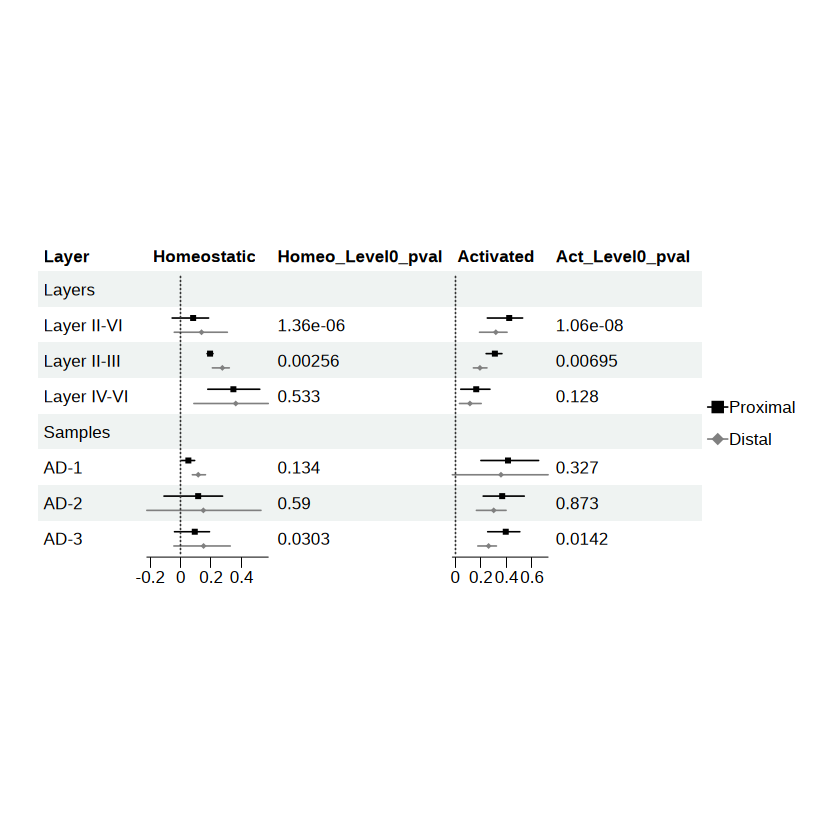

In [437]:
p <- forest(both[c(1,3,2,4:8),c(1,7,8,21,22)],
est = list(both$Homeo_Level0_med,both$Act_Level0_med,both$Homeo_Other_med,both$Act_Other_med),
lower = list(both$Homeo_Level0_min,both$Act_Level0_min,both$Homeo_Other_min,both$Act_Other_min),
upper = list(both$Homeo_Level0_max,both$Act_Level0_max,both$Homeo_Other_max,both$Act_Other_max),
            ci_column = c(2, 4),
           ref_line = 0,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
            p

In [380]:
p <- forest(both[c(1,3,2,4:8),c(1,7,8,21,22)],
est = list(both$Homeo_Level0_med,both$Act_Level0_med,both$Homeo_Other_med,both$Act_Other_med),
lower = list(both$Homeo_Level0_min,both$Act_Level0_min,both$Homeo_Other_min,both$Act_Other_min),
upper = list(both$Homeo_Level0_max,both$Act_Level0_max,both$Homeo_Other_max,both$Act_Other_max),
            ci_column = c(2, 4),
          #  ref_line = 1,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
ggsave(p,filename = "check.pdf",height = 4, width = 10)
p

ERROR: Error in check_errors(data = data, est = est, lower = lower, upper = upper, : Estimate, lower and upper must be numeric.


In [365]:
str(dt)

'data.frame':	7 obs. of  24 variables:
 $ Subgroup    : chr  "   All Patients" "Sex" "     Male" "     Female" ...
 $ Treatment   : int  781 NA 535 246 NA 297 484
 $ Placebo     : int  780 NA 548 232 NA 333 447
 $ est         : num  1.87 NA 1.45 2.28 NA ...
 $ low         : num  0.1325 NA 0.0683 0.5077 NA ...
 $ hi          : num  3.61 NA 2.83 4.04 NA ...
 $ low_gp1     : num  0.151 NA 1.915 0.634 NA ...
 $ low_gp2     : num  0.3544 NA 0.0995 2.5737 NA ...
 $ low_gp3     : num  0.394 NA 0.38 1.023 NA ...
 $ low_gp4     : num  1.152 NA 0.321 0.351 NA ...
 $ est_gp1     : num  1.18 NA 3.27 1.97 NA ...
 $ est_gp2     : num  1.516 NA 0.829 3.972 NA ...
 $ est_gp3     : num  1.61 NA 1.64 1.75 NA ...
 $ est_gp4     : num  1.95 NA 1.61 1.74 NA ...
 $ hi_gp1      : num  2.92 NA 4 3.97 NA ...
 $ hi_gp2      : num  2.92 NA 1.55 5.44 NA ...
 $ hi_gp3      : num  3.49 NA 2.57 3.67 NA ...
 $ hi_gp4      : num  2.86 NA 2.23 3.25 NA ...
 $ n1          : chr  "781" "" "535" "246" ...
 $ n2          : 

In [366]:
str(both)

'data.frame':	8 obs. of  29 variables:
 $ Layer            : chr  "Layers" "Layer II-III" "Layer II-VI" "Layer IV-VI" ...
 $ Homeo_Level0_min : chr  "" "-0.0544747081712062" "0.174817518248175" "0.179465776293823" ...
 $ Homeo_Level0_q1  : chr  "" "0.0350194552529183" "0.189051094890511" "0.307178631051753" ...
 $ Homeo_Level0_med : chr  "" "0.0830090791180285" "0.194160583941606" "0.347245409015025" ...
 $ Homeo_Level0_q3  : chr  "" "0.0946822308690013" "0.198540145985401" "0.392320534223706" ...
 $ Homeo_Level0_max : chr  "" "0.184176394293126" "0.212773722627737" "0.520033388981636" ...
 $ Homeostatic      : chr  "" "" "" "" ...
 $ Homeo_Level0_pval: chr  "" "0.00256" "1.36e-06" "0.533" ...
 $ Homeo_Other_min  : chr  "" "-0.0406277958202341" "0.209433434494958" "0.0880909616896428" ...
 $ Homeo_Other_q1   : chr  "" "0.0898990224576662" "0.250954401640837" "0.271004189019057" ...
 $ Homeo_Other_med  : chr  "" "0.137879951930933" "0.274709207261199" "0.362717845226386" ...
 $ Homeo_Ot

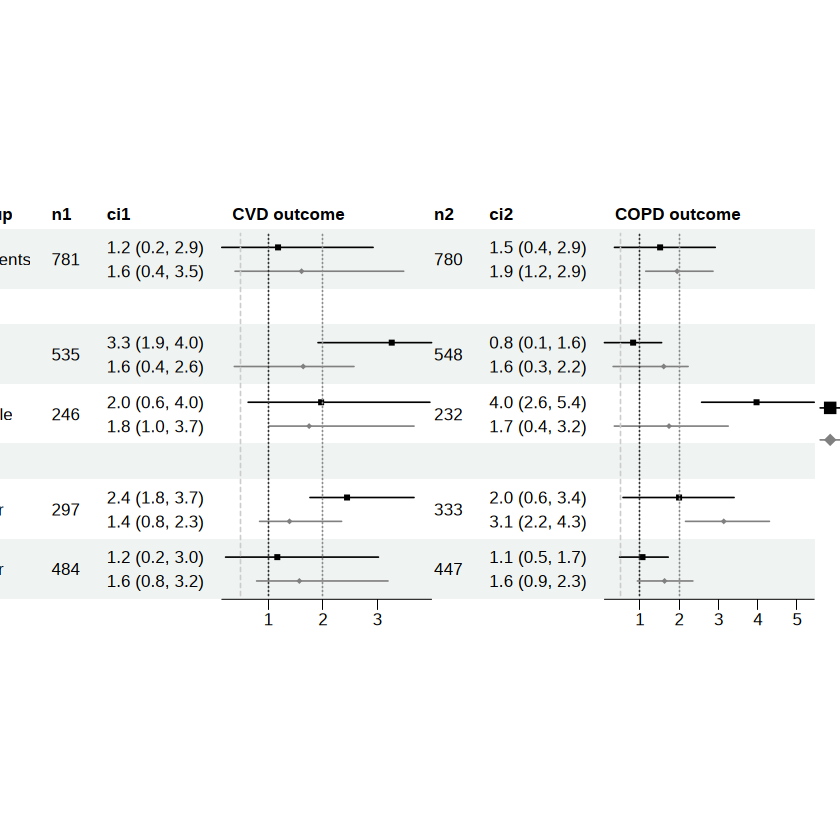

In [364]:
p <- forest(dt[,c(1, 19, 23, 21, 20, 24, 22)],
            est = list(dt$est_gp1,
                       dt$est_gp2,
                       dt$est_gp3,
                       dt$est_gp4),
            lower = list(dt$low_gp1,
                         dt$low_gp2,
                         dt$low_gp3,
                         dt$low_gp4), 
            upper = list(dt$hi_gp1,
                         dt$hi_gp2,
                         dt$hi_gp3,
                         dt$hi_gp4),
            ci_column = c(4, 7),
            ref_line = 1,
            vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
            p

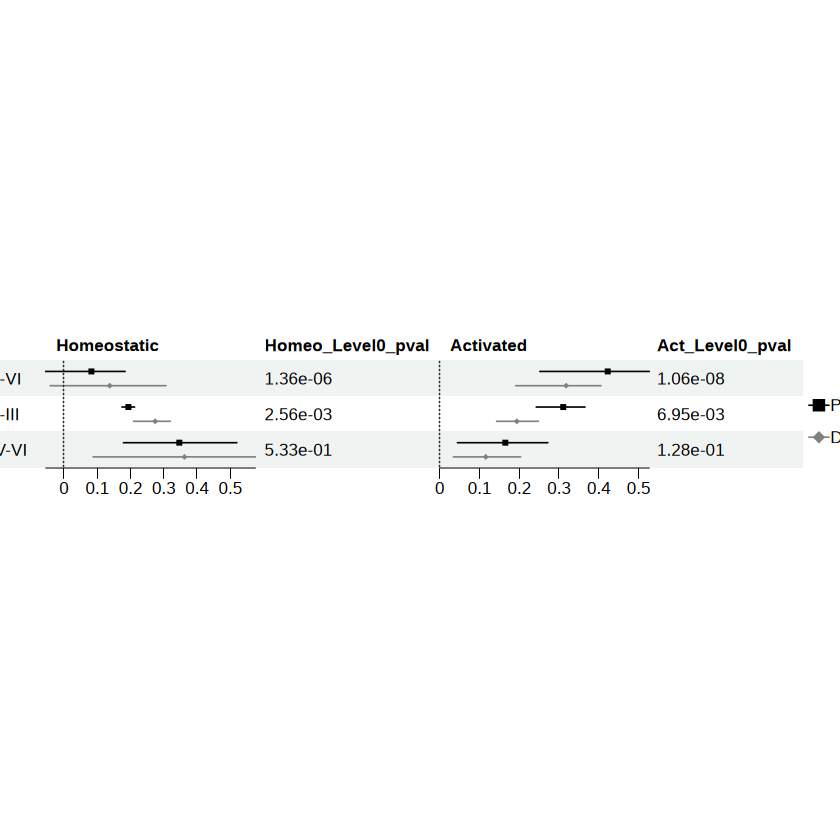

In [231]:
p <- forest(dt[c(2,1,3),c(1,7,8,21,22)],
est = list(dt$Homeo_Level0_med,dt$Act_Level0_med,dt$Homeo_Other_med,dt$Act_Other_med),
lower = list(dt$Homeo_Level0_min,dt$Act_Level0_min,dt$Homeo_Other_min,dt$Act_Other_min),
upper = list(dt$Homeo_Level0_max,dt$Act_Level0_max,dt$Homeo_Other_max,dt$Act_Other_max),
            ci_column = c(2, 4),
          #  ref_line = 1,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
ggsave(p,filename = "check.pdf",height = 4, width = 10)
p

eaach sample

In [ ]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/all_pval_data.xlsx", sheet = "Sheet2", .name_repair = "minimal")

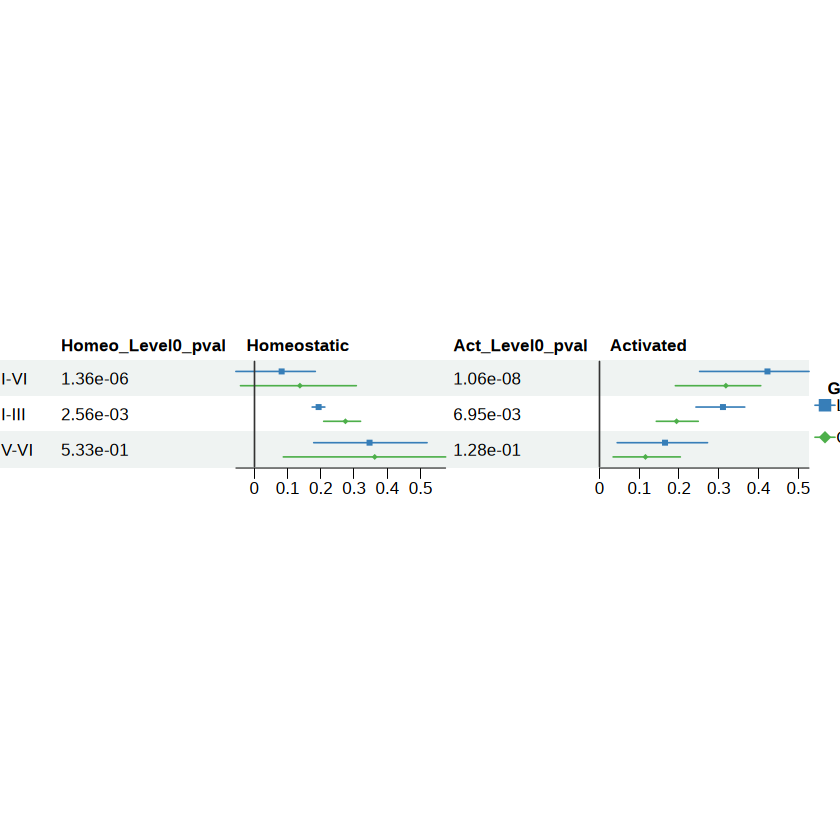

In [207]:
p <- forest(dt[c(2,1,3),c(1,8,7,22,21)],
est = list(dt$Homeo_Level0_med,dt$Act_Level0_med,dt$Homeo_Other_med,dt$Act_Other_med),
lower = list(dt$Homeo_Level0_min,dt$Act_Level0_min,dt$Homeo_Other_min,dt$Act_Other_min),
upper = list(dt$Homeo_Level0_max,dt$Act_Level0_max,dt$Homeo_Other_max,dt$Act_Other_max),
            ci_column = c(3, 5),
          #  ref_line = 1,
           # vert_line = c(0.5, 2),
            nudge_y = 0.4,
            theme = tm)
ggsave(p,filename = "check.pdf",height = 4, width = 10)
p

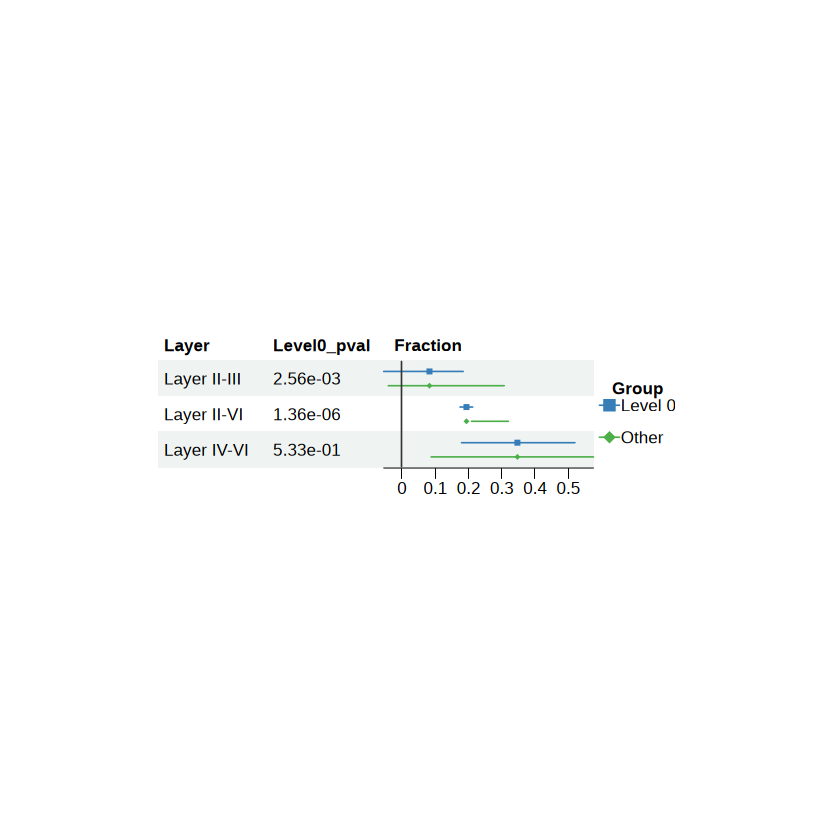

In [139]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "solid",
                   ci_pch = c(15, 18),
                   ci_col = c("#377eb8", "#4daf4a"),
                   footnote_col = "blue",
                   legend_name = "Group",
                   legend_value = c("Level 0", "Other"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#cccccc", "#8c8c8c"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(5, 5), "mm")))
                   
p <- forest(dt[,c(1,8,7)],
            est = list(dt$Level0_med,
                       dt$Level0_med),
            lower = list(dt$Level0_min,
                         dt$Other_min),
            upper = list(dt$Level0_max,
                         dt$Other_max),
            ci_column = 3,
       #     ref_line = 1,
            nudge_y = 0.4,
            theme = tm)
p

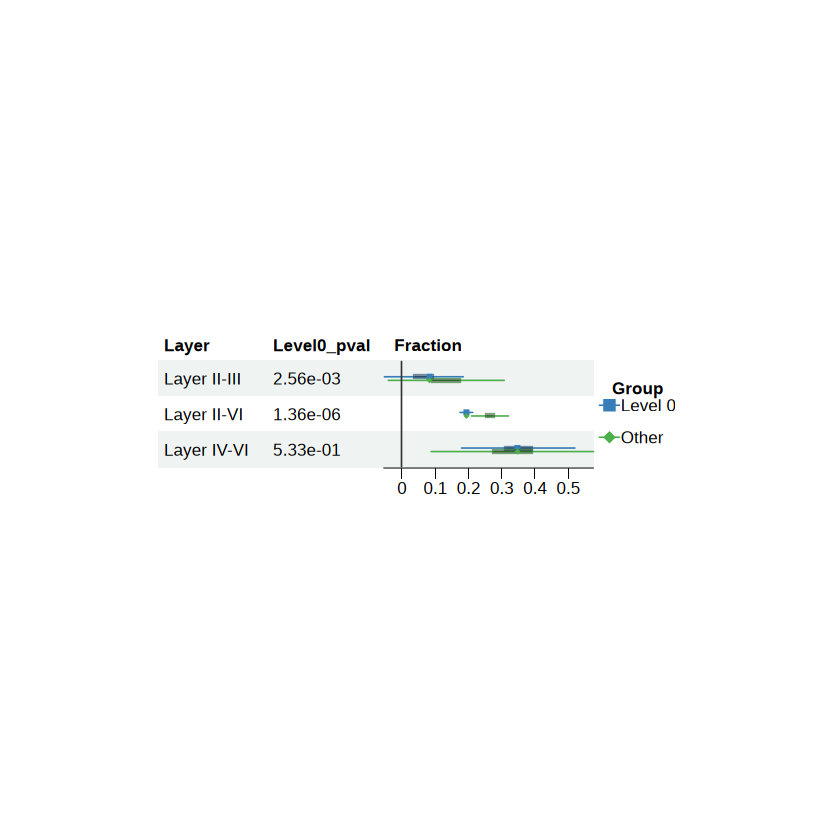

In [140]:
tm <- forest_theme(base_size = 10,
                   refline_lty = "solid",
                   ci_pch = c(15, 18),
                   ci_col = c("#377eb8", "#4daf4a"),
                   footnote_col = "blue",
                   legend_name = "Group",
                   legend_value = c("Level 0", "Other"),
                   vertline_lty = c("dashed", "dotted"),
                   vertline_col = c("#d6604d", "#bababa"),
                   # Table cell padding, width 4 and heights 3
                   core = list(padding = unit(c(5, 5), "mm")))


p <- forest(dt[,c(1,8,7)],
            est = list(dt$Level0_med,
                       dt$Level0_med),
            lower = list(dt$Level0_min,
                         dt$Other_min),
            upper = list(dt$Level0_max,
                         dt$Other_max),
            # sizes = sizes,
            fn_ci = make_boxplot,
            ci_column = 3,
            lowhinge = list(dt$Level0_q1, dt$Other_q1),
            uphinge = list(dt$Level0_q3, dt$Other_q3),
            hinge_height = 0.2,
            # values of the lowhinge and uphinge will be used as row values
            index_args = c("lowhinge", "uphinge"), 
            gp_box = gpar(fill = "black", alpha = 0.4),
            theme = tm
)
#ggsave(p,filename = "check.pdf",height = 4, width = 5)
p